In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from abc import ABC, abstractmethod
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import partial
import matplotlib.pyplot as plt
import datetime
#from indicators import moving_average, exp_moving_average, vwap
#from Signals import *
from AlgoCrac import moving_average, exp_moving_average, vwap
from AlgoCrac.Signals.Signals import *
from AlgoCrac.Signals.utils import *
from AlgoCrac.Data.data import *



from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset
import darts

In [5]:
sym = ["WIX",'MMM']
data = get_data(sym, start = "2023-02-21",end="2023-02-22",interval = '5m')



[*********************100%***********************]  2 of 2 completed


In [19]:
b = [to_datetime(str(t)) for t in data.index]

In [22]:
data.index = b

In [24]:
b = [to_datetime(str(t)) for t in data.index]

In [23]:
data

,Adj Close_MMM,Adj Close_WIX,Close_MMM,Close_WIX,High_MMM,High_WIX,Low_MMM,Low_WIX,Open_MMM,Open_WIX,Volume_MMM,Volume_WIX
2023-02-21 09:30:00,111.901001,82.389999,111.901001,82.389999,112.399902,83.220001,111.750000,82.389999,112.000000,82.889999,107765,13087
2023-02-21 09:35:00,111.451401,82.407501,111.451401,82.407501,111.904999,83.490799,111.120003,82.320000,111.904999,82.320000,49135,14739
2023-02-21 09:40:00,111.459999,82.589996,111.459999,82.589996,111.660004,83.010002,111.379997,82.500000,111.419998,82.500000,28106,11508
2023-02-21 09:45:00,111.129997,82.629997,111.129997,82.629997,111.449997,83.150002,110.943100,82.239998,111.410004,82.559998,72265,33854
2023-02-21 09:50:00,110.930000,82.684998,110.930000,82.684998,111.209999,82.830002,110.808800,82.089996,111.099998,82.629997,42690,29584
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 15:35:00,109.485001,81.360001,109.485001,81.360001,109.629997,81.855003,109.430000,81.339996,109.620003,81.714996,33231,16268
2023-02-21 15:40:00,109.589996,81.055000,109.589996,81.055000,109.589996,81.459999,109.489998,81.040001,109.489998,81.360001,53676,36041
2023-02-21 15:45:00,109.660004,81.209999,109.660004,81.209999,109.690002,81.230003,109.570000,80.889999,109.629997,81.050003,64035,47997
2023-02-21 15:50:00,109.400002,81.070000,109.400002,81.070000,109.680000,81.199997,109.379997,80.940002,109.650002,81.169998,144593,48361


In [20]:
data

,Adj Close_MMM,Adj Close_WIX,Close_MMM,Close_WIX,High_MMM,High_WIX,Low_MMM,Low_WIX,Open_MMM,Open_WIX,Volume_MMM,Volume_WIX
Datetime,,,,,,,,,,,,
2023-02-21 09:30:00-05:00,111.901001,82.389999,111.901001,82.389999,112.399902,83.220001,111.750000,82.389999,112.000000,82.889999,107765,13087
2023-02-21 09:35:00-05:00,111.451401,82.407501,111.451401,82.407501,111.904999,83.490799,111.120003,82.320000,111.904999,82.320000,49135,14739
2023-02-21 09:40:00-05:00,111.459999,82.589996,111.459999,82.589996,111.660004,83.010002,111.379997,82.500000,111.419998,82.500000,28106,11508
2023-02-21 09:45:00-05:00,111.129997,82.629997,111.129997,82.629997,111.449997,83.150002,110.943100,82.239998,111.410004,82.559998,72265,33854
2023-02-21 09:50:00-05:00,110.930000,82.684998,110.930000,82.684998,111.209999,82.830002,110.808800,82.089996,111.099998,82.629997,42690,29584
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 15:35:00-05:00,109.485001,81.360001,109.485001,81.360001,109.629997,81.855003,109.430000,81.339996,109.620003,81.714996,33231,16268
2023-02-21 15:40:00-05:00,109.589996,81.055000,109.589996,81.055000,109.589996,81.459999,109.489998,81.040001,109.489998,81.360001,53676,36041
2023-02-21 15:45:00-05:00,109.660004,81.209999,109.660004,81.209999,109.690002,81.230003,109.570000,80.889999,109.629997,81.050003,64035,47997


In [16]:
data.index

DatetimeIndex(['2023-02-21 09:30:00-05:00', '2023-02-21 09:35:00-05:00',
               '2023-02-21 09:40:00-05:00', '2023-02-21 09:45:00-05:00',
               '2023-02-21 09:50:00-05:00', '2023-02-21 09:55:00-05:00',
               '2023-02-21 10:00:00-05:00', '2023-02-21 10:05:00-05:00',
               '2023-02-21 10:10:00-05:00', '2023-02-21 10:15:00-05:00',
               '2023-02-21 10:20:00-05:00', '2023-02-21 10:25:00-05:00',
               '2023-02-21 10:30:00-05:00', '2023-02-21 10:35:00-05:00',
               '2023-02-21 10:40:00-05:00', '2023-02-21 10:45:00-05:00',
               '2023-02-21 10:50:00-05:00', '2023-02-21 10:55:00-05:00',
               '2023-02-21 11:00:00-05:00', '2023-02-21 11:05:00-05:00',
               '2023-02-21 11:10:00-05:00', '2023-02-21 11:15:00-05:00',
               '2023-02-21 11:20:00-05:00', '2023-02-21 11:25:00-05:00',
               '2023-02-21 11:30:00-05:00', '2023-02-21 11:35:00-05:00',
               '2023-02-21 11:40:00-05:00', '2023-0

In [6]:
# to TimeSeriers
data1 = data
col_names = data.columns.map('_'.join)
data1.columns = col_names
ts_data = TimeSeries.from_dataframe(data1)

In [14]:
data.index

DatetimeIndex(['2023-02-21 09:30:00-05:00', '2023-02-21 09:35:00-05:00',
               '2023-02-21 09:40:00-05:00', '2023-02-21 09:45:00-05:00',
               '2023-02-21 09:50:00-05:00', '2023-02-21 09:55:00-05:00',
               '2023-02-21 10:00:00-05:00', '2023-02-21 10:05:00-05:00',
               '2023-02-21 10:10:00-05:00', '2023-02-21 10:15:00-05:00',
               '2023-02-21 10:20:00-05:00', '2023-02-21 10:25:00-05:00',
               '2023-02-21 10:30:00-05:00', '2023-02-21 10:35:00-05:00',
               '2023-02-21 10:40:00-05:00', '2023-02-21 10:45:00-05:00',
               '2023-02-21 10:50:00-05:00', '2023-02-21 10:55:00-05:00',
               '2023-02-21 11:00:00-05:00', '2023-02-21 11:05:00-05:00',
               '2023-02-21 11:10:00-05:00', '2023-02-21 11:15:00-05:00',
               '2023-02-21 11:20:00-05:00', '2023-02-21 11:25:00-05:00',
               '2023-02-21 11:30:00-05:00', '2023-02-21 11:35:00-05:00',
               '2023-02-21 11:40:00-05:00', '2023-0

In [9]:
scaler = Scaler()
ts_data_scaled = scaler.fit_transform(ts_data).astype(np.float32)

[2023-03-11 13:36:16,382] WARNING | darts.timeseries | Number of components is larger than 10 (12). Plotting only the first 10 components.
2023-03-11 13:36:16 darts.timeseries WARNING: Number of components is larger than 10 (12). Plotting only the first 10 components.


TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

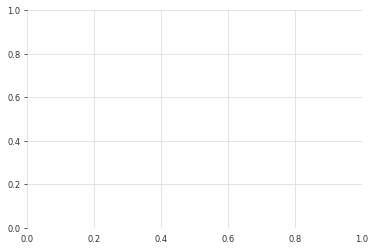

In [12]:
ts_data_scaled.plot()

In [10]:
ts_data_scaled.pd_dataframe()

component,Adj Close_MMM,Adj Close_WIX,Close_MMM,Close_WIX,High_MMM,High_WIX,Low_MMM,Low_WIX,Open_MMM,Open_WIX,Volume_MMM,Volume_WIX
Datetime,,,,,,,,,,,,
2023-02-21 09:30:00-05:00,1.000000,0.722727,1.000000,0.722727,1.000000,0.881789,1.000000,0.779904,1.000000,0.919998,0.389229,0.101501
2023-02-21 09:35:00-05:00,0.833543,0.730682,0.833543,0.730682,0.842382,1.000000,0.754865,0.746412,0.966312,0.634998,0.167624,0.115381
2023-02-21 09:40:00-05:00,0.836727,0.813634,0.836727,0.813634,0.764356,0.790119,0.856030,0.832536,0.794326,0.724998,0.088140,0.088235
2023-02-21 09:45:00-05:00,0.714549,0.831817,0.714549,0.831817,0.697473,0.851232,0.686031,0.708133,0.790781,0.754997,0.255049,0.275980
2023-02-21 09:50:00-05:00,0.640504,0.856817,0.640504,0.856817,0.621038,0.711543,0.633774,0.636362,0.680851,0.789997,0.143263,0.240105
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 15:35:00-05:00,0.105518,0.254545,0.105518,0.254545,0.117837,0.285929,0.097276,0.277510,0.156029,0.332497,0.107511,0.128227
2023-02-21 15:40:00-05:00,0.144391,0.115908,0.144391,0.115908,0.105097,0.113498,0.120622,0.133971,0.109928,0.154999,0.184787,0.294355
2023-02-21 15:45:00-05:00,0.170310,0.186362,0.170310,0.186362,0.136947,0.013099,0.151751,0.062200,0.159573,0.000000,0.223942,0.394806


In [8]:
data1

,Adj Close_MMM,Adj Close_WIX,Close_MMM,Close_WIX,High_MMM,High_WIX,Low_MMM,Low_WIX,Open_MMM,Open_WIX,Volume_MMM,Volume_WIX
Datetime,,,,,,,,,,,,
2023-02-21 09:30:00-05:00,111.901001,82.389999,111.901001,82.389999,112.399902,83.220001,111.750000,82.389999,112.000000,82.889999,107765,13087
2023-02-21 09:35:00-05:00,111.451401,82.407501,111.451401,82.407501,111.904999,83.490799,111.120003,82.320000,111.904999,82.320000,49135,14739
2023-02-21 09:40:00-05:00,111.459999,82.589996,111.459999,82.589996,111.660004,83.010002,111.379997,82.500000,111.419998,82.500000,28106,11508
2023-02-21 09:45:00-05:00,111.129997,82.629997,111.129997,82.629997,111.449997,83.150002,110.943100,82.239998,111.410004,82.559998,72265,33854
2023-02-21 09:50:00-05:00,110.930000,82.684998,110.930000,82.684998,111.209999,82.830002,110.808800,82.089996,111.099998,82.629997,42690,29584
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 15:35:00-05:00,109.485001,81.360001,109.485001,81.360001,109.629997,81.855003,109.430000,81.339996,109.620003,81.714996,33231,16268
2023-02-21 15:40:00-05:00,109.589996,81.055000,109.589996,81.055000,109.589996,81.459999,109.489998,81.040001,109.489998,81.360001,53676,36041
2023-02-21 15:45:00-05:00,109.660004,81.209999,109.660004,81.209999,109.690002,81.230003,109.570000,80.889999,109.629997,81.050003,64035,47997


In [23]:
class Forecast(Signals):
    # indicator: a function for applying the indicator to retrieve the signals
    # invert: simply changes the default signal from 1 to -1 and vice versa. 
    def __init__(self,
                 period = None,
                 model = None,
                 on = "Close",
                 invert = False, # invert the signal, can return when to exit a position.
                 eps = 0.0, # allow only signals that the indicator surpasses a certain fraction of the target, [0,inf]
                 last_signal = 'dis',
                 min_timesteps = None,
                 min_lookback = 3,
                 horizon = 1,
                ):
        super().__init__(min_timesteps = min_timesteps , last_signal = last_signal, min_lookback = min_lookback)
        self.period = period
        self.model = model
        self.horizon = horizon
        self.invert = invert
        # check if eps is in [0,1]
        if eps<0:
            raise Exception("eps should be in [0,inf]")
        self.eps = eps
        self.on = on

In [10]:
df = EnergyDataset().load().pd_dataframe()

In [11]:
df

component,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 19:00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 20:00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30


In [8]:
ad = EnergyDataset().load()

In [9]:
ad

<TimeSeries (DataArray) (time: 35064, component: 28, sample: 1)>
array([[[  447.  ],
        [  329.  ],
        [    0.  ],
        ...,
        [25385.  ],
        [   50.1 ],
        [   65.41]],

       [[  449.  ],
        [  328.  ],
        [    0.  ],
        ...,
        [24382.  ],
        [   48.1 ],
        [   64.92]],

       [[  448.  ],
        [  323.  ],
        [    0.  ],
        ...,
...
        ...,
        [28071.  ],
        [   66.88],
        [   74.3 ]],

       [[  293.  ],
        [    0.  ],
        [    0.  ],
        ...,
        [25801.  ],
        [   63.93],
        [   69.89]],

       [[  290.  ],
        [    0.  ],
        [    0.  ],
        ...,
        [24455.  ],
        [   64.27],
        [   69.88]]])
Coordinates:
  * time       (time) datetime64[ns] 2014-12-31T23:00:00 ... 2018-12-31T22:00:00
  * component  (component) object 'generation biomass' ... 'price actual'
Dimensions without coordinates: sample

In [27]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=30,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)
train = ts_data.copy()
model_nbeats.fit(train,  verbose=True)

[2023-03-11 12:51:13,092] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 42 samples.
[2023-03-11 12:51:13,092] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 42 samples.
2023-03-11 12:51:13 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 42 samples.
[2023-03-11 12:51:13,403] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2023-03-11 12:51:13,403] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2023-03-11 12:51:13 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
[2023-03-11 12:51:13,407] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning T

Training: 0it [00:00, ?it/s]

[2023-03-11 13:08:26,306] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2023-03-11 13:08:26,306] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
2023-03-11 13:08:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 940 samples.
[2023-03-11 13:08:26,512] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2023-03-11 13:08:26,512] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
2023-03-11 13:08:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
[2023-03-11 13:08:26,517] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightnin

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

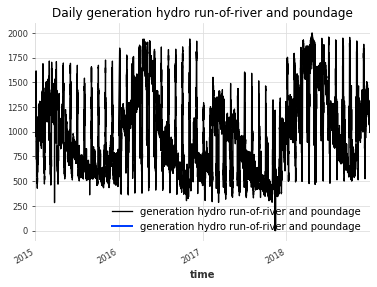

In [34]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")
train, val = series.split_after(pd.Timestamp("20170901"))

model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=10,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

model_nbeats.fit(train, val_series=val, verbose=True)

In [36]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

In [38]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=True,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))

  0%|          | 0/97 [00:00<?, ?it/s]

[2023-03-11 13:16:22,183] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 939 samples.
[2023-03-11 13:16:22,183] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 939 samples.
2023-03-11 13:16:22 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 939 samples.
2023-03-11 13:16:22 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2023-03-11 13:16:22 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2023-03-11 13:16:22 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
[2023-03-11 13:16:22,213] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_nam

Training: 0it [00:00, ?it/s]

c:\Users\liran\anaconda3\envs\DA2\lib\site-packages\pytorch_lightning\trainer\trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


Predicting: 1it [00:00, ?it/s]

[2023-03-11 13:16:32,022] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 944 samples.
[2023-03-11 13:16:32,022] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 944 samples.
2023-03-11 13:16:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 944 samples.
2023-03-11 13:16:32 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2023-03-11 13:16:32 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2023-03-11 13:16:32 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
[2023-03-11 13:16:32,039] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_nam

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

[2023-03-11 13:16:44,289] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 949 samples.
[2023-03-11 13:16:44,289] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 949 samples.
2023-03-11 13:16:44 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 949 samples.
2023-03-11 13:16:44 pytorch_lightning.utilities.distributed INFO: GPU available: False, used: False
2023-03-11 13:16:44 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2023-03-11 13:16:44 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
[2023-03-11 13:16:44,303] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_nam

Training: 0it [00:00, ?it/s]

In [16]:
df_day_avg

component,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31,447.000000,329.000000,0.0,4844.000000,4821.000000,162.000000,0.0,0.0,0.0,...,196.000000,0.0,6378.000000,17.000000,NaN,6436.000000,26118.000000,25385.000000,50.100000,65.410000
1,2015-01-01,425.208333,243.708333,0.0,4187.791667,4099.458333,161.500000,0.0,0.0,0.0,...,201.041667,0.0,3994.000000,1049.500000,NaN,3942.416667,24753.250000,23966.958333,45.031667,62.090833
2,2015-01-02,389.875000,0.000000,0.0,3566.166667,1258.125000,200.833333,0.0,0.0,0.0,...,186.583333,0.0,11060.041667,1187.208333,NaN,11117.041667,27519.416667,27188.541667,17.598333,69.443750
3,2015-01-03,436.875000,0.000000,0.0,3451.791667,1375.958333,229.791667,0.0,0.0,0.0,...,202.333333,0.0,9137.250000,1133.375000,NaN,9113.416667,25500.833333,25097.750000,25.342083,65.223333
4,2015-01-04,396.375000,13.583333,0.0,3526.125000,2315.291667,356.625000,0.0,0.0,0.0,...,159.125000,0.0,8016.125000,2292.041667,NaN,8022.833333,27167.875000,27104.916667,30.658333,58.912083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2018-12-27,304.666667,701.041667,0.0,9768.750000,2901.125000,297.000000,0.0,0.0,0.0,...,297.541667,0.0,1115.916667,707.375000,NaN,1300.083333,28856.500000,28551.708333,67.585417,72.959583
1458,2018-12-28,316.291667,632.000000,0.0,7994.166667,2745.625000,273.458333,0.0,0.0,0.0,...,306.833333,0.0,4111.250000,743.958333,NaN,4226.208333,28553.416667,28661.166667,63.546667,69.230417
1459,2018-12-29,288.500000,0.000000,0.0,4972.458333,1716.208333,253.375000,0.0,0.0,0.0,...,310.750000,0.0,7156.958333,673.333333,NaN,6665.833333,26427.166667,26603.958333,57.085833,62.623333
1460,2018-12-30,275.333333,0.000000,0.0,5293.208333,1520.916667,224.083333,0.0,0.0,0.0,...,311.250000,0.0,4924.583333,1021.583333,NaN,4989.583333,25278.416667,25238.500000,58.552917,64.567083
